In [ ]:
pip install google-api-python-client

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [2]:
api_key ='-------'

channel_ids = ['UC7cs8q-gJRlGwj4A8OmCmXg', #1-Alex the analyst
               'UCWv7vMbMWH4-V0ZXdmDpPBA', #2-programming with mosh
               'UCybBViio_TH_uiFFDJuz5tg', #3-Einzelgänger
               'UCYO_jab_esuFRV4b17AJtAw', #4-3Blue1Brown 
               'UCxladMszXan-jfgzyeIMyvw', #5-Rob Mulla              
               'UCtYLUTtgS3k1Fg4y5tAhLbw', #6-starquest
               'UCgBncpylJ1kiVaPyP-PZauQ', #7-serrano
               'UChYnFEN9cfPPeDq3nneiWcA', #8-data is good
               'UCteRPiisgIoHtMgqHegpWAQ', #9-sundas khalis
               'UC8ofcOdHNINiPrBA9D59Vaw' #10-bhavesh bhatt
              ] 

youtube = build('youtube', 'v3', developerKey=api_key)

In [3]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute()
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    
    return all_data

In [4]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [5]:
channel_data = pd.DataFrame(channel_statistics)

In [6]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Einzelgänger,1890000,172854494,231,UUybBViio_TH_uiFFDJuz5tg
1,Data is Good (Hindi),12800,920219,132,UUhYnFEN9cfPPeDq3nneiWcA
2,3Blue1Brown,5170000,338028060,129,UUYO_jab_esuFRV4b17AJtAw
3,Rob Mulla,82100,4520376,115,UUxladMszXan-jfgzyeIMyvw
4,Sundas Khalid,139000,6094578,99,UUteRPiisgIoHtMgqHegpWAQ
5,Serrano.Academy,113000,5427084,42,UUgBncpylJ1kiVaPyP-PZauQ
6,StatQuest with Josh Starmer,926000,48793660,255,UUtYLUTtgS3k1Fg4y5tAhLbw
7,Programming with Mosh,3280000,163054106,176,UUWv7vMbMWH4-V0ZXdmDpPBA
8,Alex The Analyst,467000,18421497,209,UU7cs8q-gJRlGwj4A8OmCmXg
9,Bhavesh Bhatt,44900,3763332,336,UU8ofcOdHNINiPrBA9D59Vaw


In [7]:
 channel_data.dtypes

Channel_name    object
Subscribers     object
Views           object
Total_videos    object
playlist_id     object
dtype: object

In [8]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

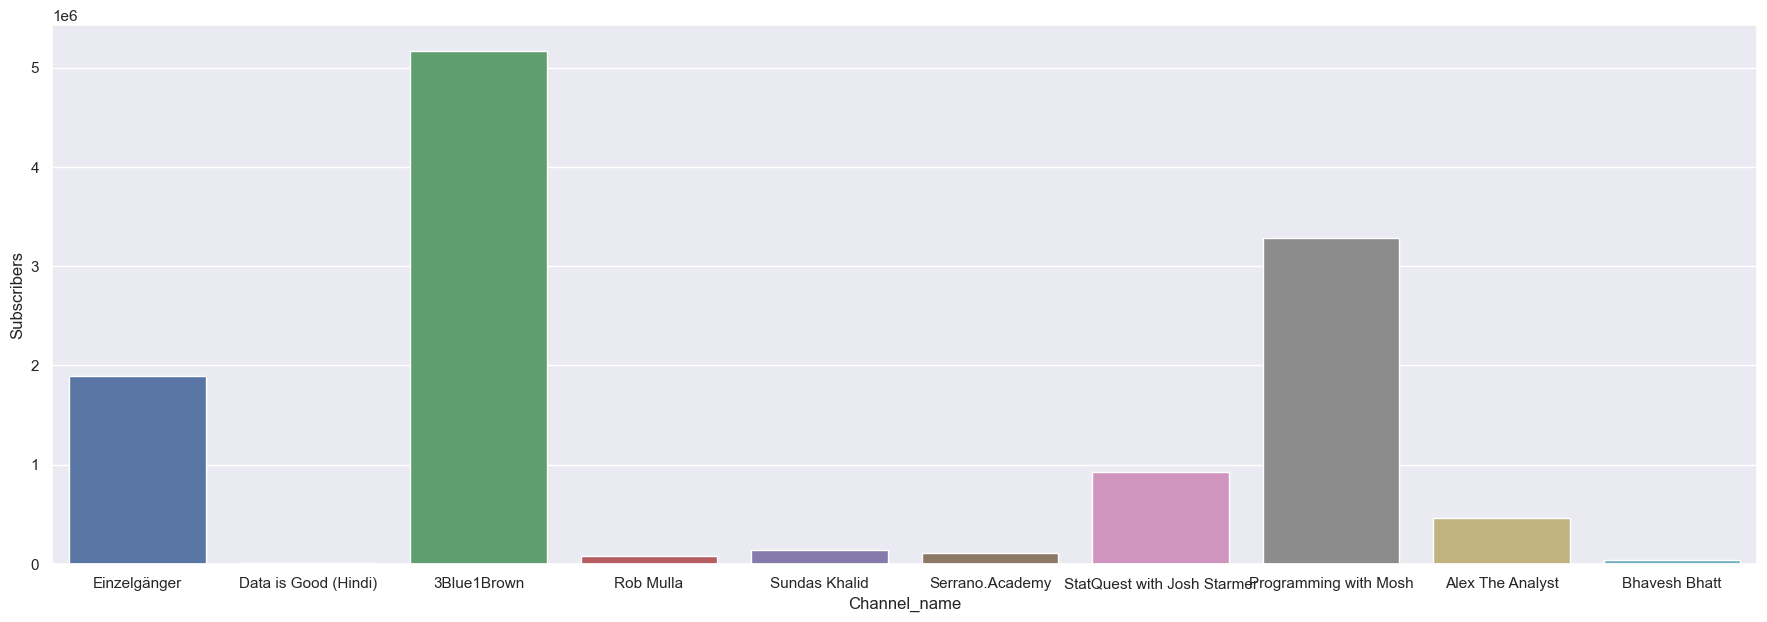

In [9]:
sns.set(rc={'figure.figsize':(22,7)})
ax = sns.barplot(x = 'Channel_name', y = 'Subscribers', data=channel_data)

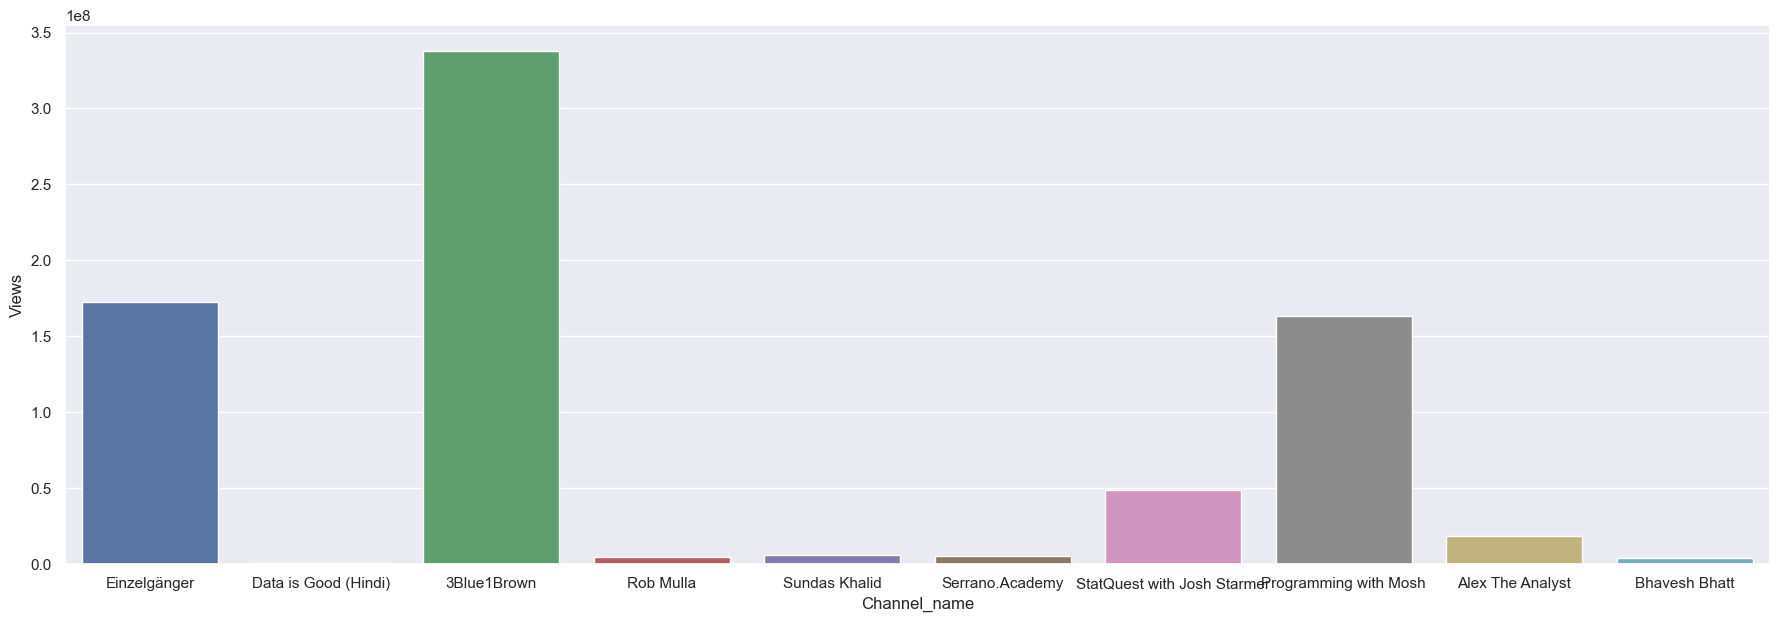

In [10]:
ax = sns.barplot(x = 'Channel_name', y = 'Views', data=channel_data)

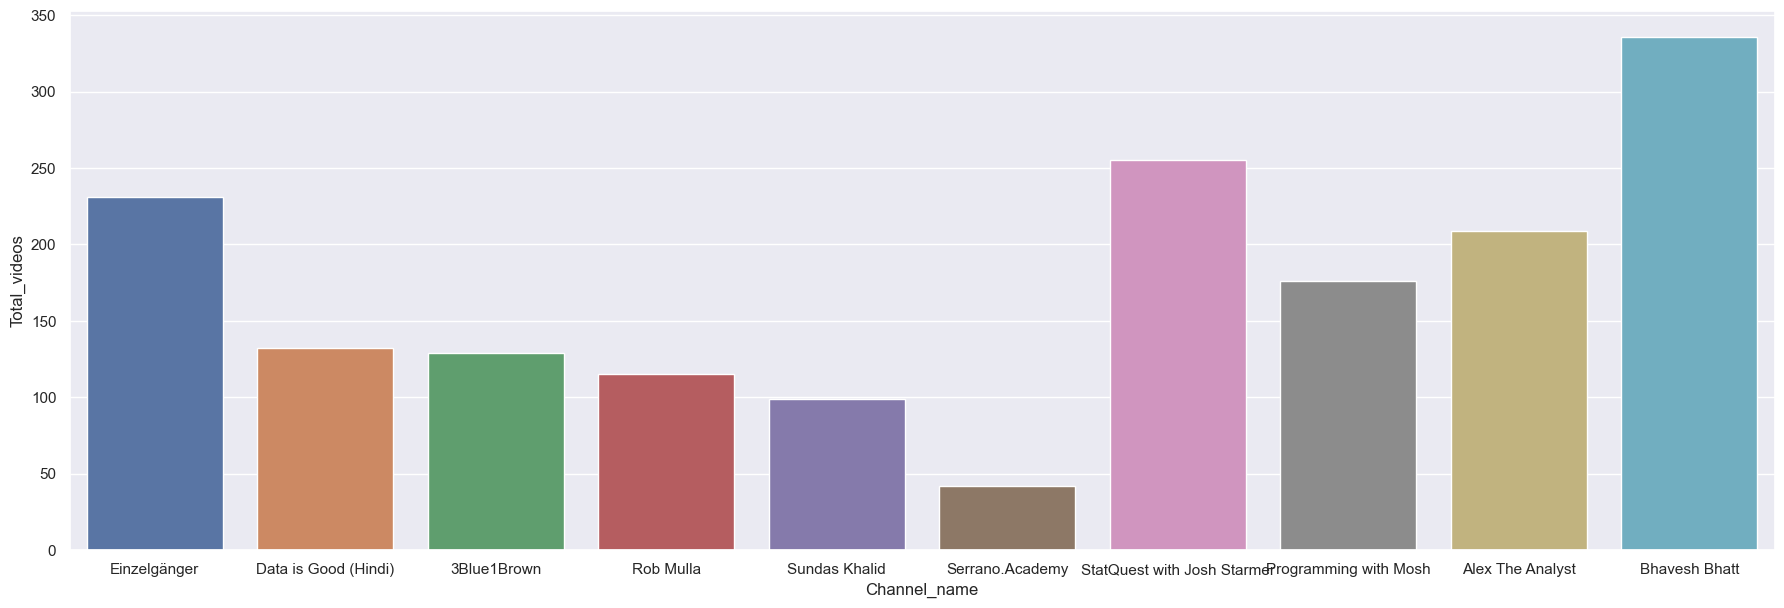

In [11]:
ax = sns.barplot(x = 'Channel_name', y = 'Total_videos', data=channel_data)

In [12]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Einzelgänger,1890000,172854494,231,UUybBViio_TH_uiFFDJuz5tg
1,Data is Good (Hindi),12800,920219,132,UUhYnFEN9cfPPeDq3nneiWcA
2,3Blue1Brown,5170000,338028060,129,UUYO_jab_esuFRV4b17AJtAw
3,Rob Mulla,82100,4520376,115,UUxladMszXan-jfgzyeIMyvw
4,Sundas Khalid,139000,6094578,99,UUteRPiisgIoHtMgqHegpWAQ
5,Serrano.Academy,113000,5427084,42,UUgBncpylJ1kiVaPyP-PZauQ
6,StatQuest with Josh Starmer,926000,48793660,255,UUtYLUTtgS3k1Fg4y5tAhLbw
7,Programming with Mosh,3280000,163054106,176,UUWv7vMbMWH4-V0ZXdmDpPBA
8,Alex The Analyst,467000,18421497,209,UU7cs8q-gJRlGwj4A8OmCmXg
9,Bhavesh Bhatt,44900,3763332,336,UU8ofcOdHNINiPrBA9D59Vaw


In [13]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Alex The Analyst', 'playlist_id'].iloc[0]

In [14]:
playlist_id

'UU7cs8q-gJRlGwj4A8OmCmXg'

In [15]:
#function to get video ids

In [16]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
    
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                         part='contentDetails',
                         playlistId = playlist_id,
                         maxResults = 50,
                         pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
    
            next_page_token = response.get('nextPageToken')
    
    return video_ids

In [17]:
video_ids = get_video_ids(youtube, playlist_id)

In [18]:
video_ids

['6jtS3Hz19kc',
 'IMU1V-JugKo',
 'JpSMse3eVVg',
 'TPivN7tpdwc',
 'kky9MMydnOA',
 '2izXQUoXyjA',
 'zilfrWwbteQ',
 'PJINexERxOs',
 'gTf2GLEhKgA',
 'VRmXto2YA2I',
 '6yNsc7JVPJE',
 'mBCG9J1TVTc',
 'WizLaDdsHUs',
 'kB7FV-ijdqE',
 'dFA0E-6xT_M',
 'dUpyC40cF6Q',
 'gs0FNQR0njI',
 'C75TROiiEa0',
 'rGx1QNdYzvs',
 'CUBfrdDwznQ',
 'L-QnW_BZT3c',
 'S76iS03nGis',
 'RBEgsEVO3T8',
 'gCG07l6Fu-U',
 'DXwFsxCtukg',
 'ey1VNjU0YbM',
 '0MKcCHrTo0c',
 'bVJfQAe-UP4',
 '_2OknmkngkQ',
 'B63bN2cLVLM',
 'zvzjaqMBEso',
 'ECduJk00mUU',
 'zmIdC0_0BgY',
 'eP8-mo5jRrY',
 '-BOBedcjySI',
 'lPVke-p4S7s',
 'ppsCxnNm-JI',
 'rVhHGPDzEck',
 'pHOH7UfOhbE',
 'sXHIIW3Wt84',
 'WUeBzT43JyY',
 'DVs9u15htXU',
 'zW3qJUeJLWc',
 'm1AkWK_ODLM',
 'Pfq-8pGzgg4',
 'pixlHHe_lNQ',
 '3NV5Jtbhfcw',
 '1cfrQLoJMPI',
 '9j_EBt3RNrs',
 'm0h3Ghl6mgY',
 '50D__p6jdEI',
 'tRCGGlMI19M',
 '0QZBnhofU_U',
 'ulFY20KTzFQ',
 'PEc29sRZoTM',
 'DlEkWd-8VXA',
 'vcijg0gUXSg',
 'gCg47n_TlFc',
 'sW5LoDA1ssM',
 '4nsdARJGzJ0',
 '_QvQxm4dptI',
 'HX2TabgkzHo',
 'gP-AxN

In [19]:
#function to get video details

In [20]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                              Published_date = video['snippet']['publishedAt'],
                              Views = video['statistics']['viewCount'],
                              Likes = video['statistics']['likeCount'],
                              #Dislikes = video['statistics']['dislikeCount'],
                              Comments = video['statistics']['commentCount']
                              )
            all_video_stats.append(video_stats)
    
    return all_video_stats

In [21]:
video_details = get_video_details(youtube, video_ids)

In [22]:
video_data = pd.DataFrame(video_details)

In [23]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
#video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Comments'] = pd.to_numeric(video_data['Comments'])
video_data

,Title,Published_date,Views,Likes,Comments
0,Google Bard Got An Upgrade! + Google's New AI ...,2023-05-12,13499,448,39
1,The Ultimate Data Analytics Career Plan for 20...,2023-05-11,0,37,0
2,Creating Visualizations using Pandas Library |...,2023-05-09,9033,208,9
3,Merging DataFrames in Pandas | Python Pandas T...,2023-05-02,6083,162,17
4,Data Analyst Q/A Livestream | April Livestream...,2023-04-27,8687,321,26
...,...,...,...,...,...
205,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30,61553,1513,64
206,Working at a Big Company Vs Small Company | To...,2020-01-25,13536,375,20
207,Data Analyst Salary | 100k with No Experience,2020-01-23,58109,2045,225
208,Truth About Big Companies | Told by a Fortune ...,2020-01-21,7268,280,18


In [24]:
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)

In [25]:
top10_videos

,Title,Published_date,Views,Likes,Comments
115,Data Analyst Portfolio Project | SQL Data Expl...,2021-05-04,1173814,23773,2672
173,Top 5 Reasons Not to Become a Data Analyst,2020-08-12,881850,19040,1041
175,What Does a Data Analyst Actually Do?,2020-07-29,729359,15070,422
181,Data Scientist vs Data Analyst | Which Is Righ...,2020-06-10,711935,22596,827
178,Data Analyst vs Business Analyst | Which Is Ri...,2020-07-03,699496,18165,559
198,SQL Basics Tutorial For Beginners | Installing...,2020-03-01,658904,10260,1029
86,How To Become A Data Analyst In 2022,2022-01-04,490215,22137,642
109,How To Get a Data Analyst Job (with No Experie...,2021-06-08,412205,18431,579
167,How I Changed Careers to Become a Data Analyst...,2020-09-10,406771,11979,3781
17,ChatGPT for Data Analysts | Best Use Cases + A...,2023-02-14,353793,6690,200


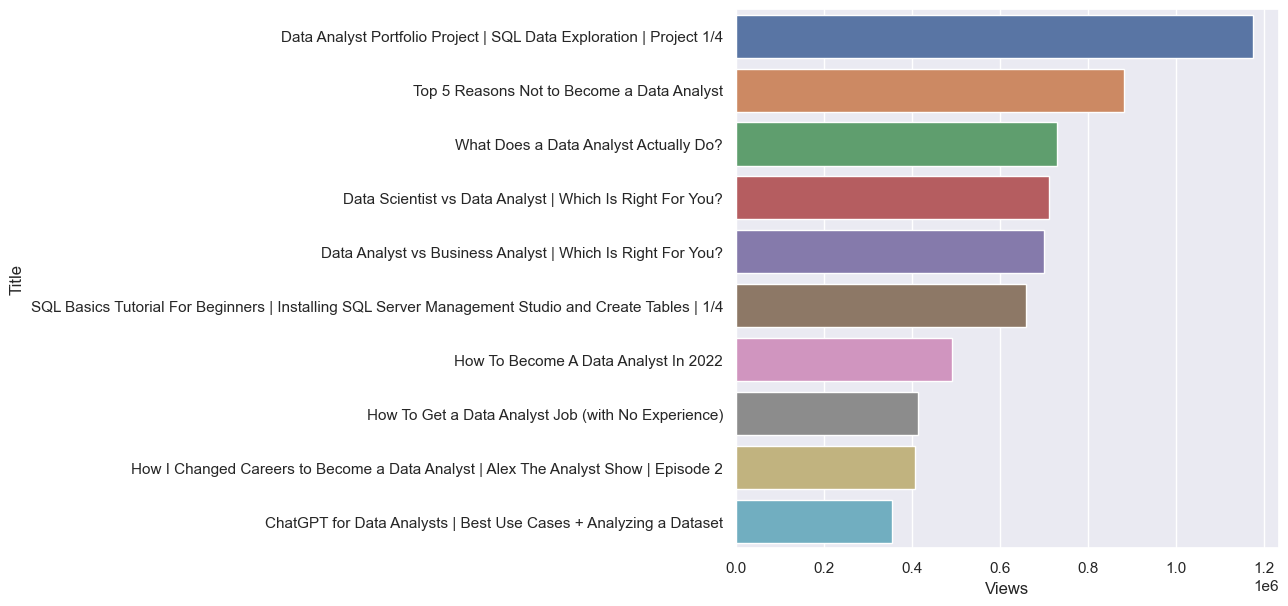

In [39]:
sns.set(rc={'figure.figsize':(7,7)})
ax = sns.barplot(x='Views', y='Title', data=top10_videos)

In [27]:
video_data

,Title,Published_date,Views,Likes,Comments
0,Google Bard Got An Upgrade! + Google's New AI ...,2023-05-12,13499,448,39
1,The Ultimate Data Analytics Career Plan for 20...,2023-05-11,0,37,0
2,Creating Visualizations using Pandas Library |...,2023-05-09,9033,208,9
3,Merging DataFrames in Pandas | Python Pandas T...,2023-05-02,6083,162,17
4,Data Analyst Q/A Livestream | April Livestream...,2023-04-27,8687,321,26
...,...,...,...,...,...
205,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30,61553,1513,64
206,Working at a Big Company Vs Small Company | To...,2020-01-25,13536,375,20
207,Data Analyst Salary | 100k with No Experience,2020-01-23,58109,2045,225
208,Truth About Big Companies | Told by a Fortune ...,2020-01-21,7268,280,18


In [28]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [29]:
video_data

,Title,Published_date,Views,Likes,Comments,Month
0,Google Bard Got An Upgrade! + Google's New AI ...,2023-05-12,13499,448,39,May
1,The Ultimate Data Analytics Career Plan for 20...,2023-05-11,0,37,0,May
2,Creating Visualizations using Pandas Library |...,2023-05-09,9033,208,9,May
3,Merging DataFrames in Pandas | Python Pandas T...,2023-05-02,6083,162,17,May
4,Data Analyst Q/A Livestream | April Livestream...,2023-04-27,8687,321,26,Apr
...,...,...,...,...,...,...
205,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30,61553,1513,64,Jan
206,Working at a Big Company Vs Small Company | To...,2020-01-25,13536,375,20,Jan
207,Data Analyst Salary | 100k with No Experience,2020-01-23,58109,2045,225,Jan
208,Truth About Big Companies | Told by a Fortune ...,2020-01-21,7268,280,18,Jan


In [30]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date

In [31]:
videos_per_month = video_data.groupby('Month', as_index=False).size()

In [32]:
videos_per_month

,Month,size
0,Apr,19
1,Aug,15
2,Dec,18
3,Feb,19
4,Jan,24
5,Jul,11
6,Jun,13
7,Mar,23
8,May,18
9,Nov,17


In [33]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [34]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [35]:
videos_per_month = videos_per_month.sort_index()

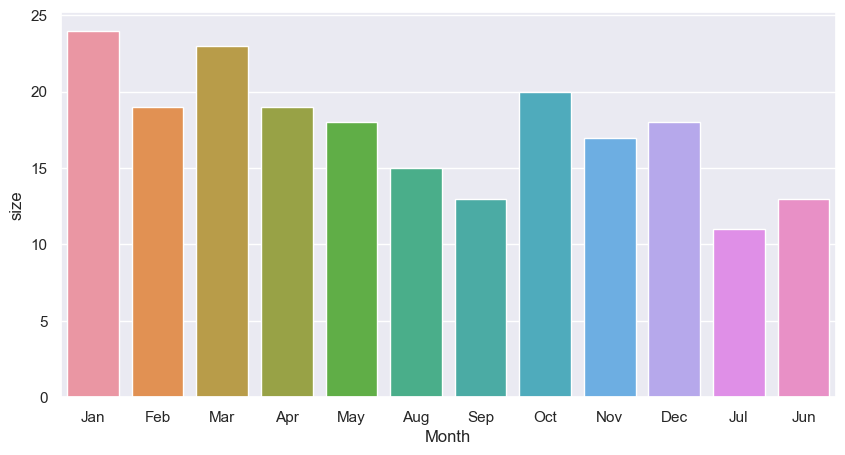

In [36]:
sns.set(rc={'figure.figsize':(10,5)})
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)

In [54]:
video_data.to_csv('Alex The Analyst.csv')

In [55]:
video_data.to_json('Alex The Analyst.json')

In [40]:
pip install pymongo

  Using cached pymongo-4.3.3-cp39-cp39-win_amd64.whl (382 kB)
  Using cached dnspython-2.3.0-py3-none-any.whl (283 kB)
Note: you may need to restart the kernel to use updated packages.


In [41]:
import pymongo

In [42]:
client = pymongo.MongoClient('mongodb://localhost:27017')

In [43]:
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [44]:
client.list_database_names()

['admin', 'bizcard', 'config', 'data', 'local', 'pppulse', 'twitter']

In [45]:
db = client['twitter']

In [46]:
db.list_collection_names()

['tdata']

In [49]:
client.list_database_names()

['Ytube', 'admin', 'bizcard', 'config', 'data', 'local', 'pppulse', 'twitter']

In [119]:
db = client["Ytube"]

In [120]:
my_collection = db['vdata']

In [88]:
import json

In [103]:
file = open("Alex The Analyst.csv","r")

In [104]:
for i in file:
    print(i)

,Title,Published_date,Views,Likes,Comments,Month

0,Google Bard Got An Upgrade! + Google's New AI Announcements!,2023-05-12,13499,448,39,May

1,The Ultimate Data Analytics Career Plan for 2023 | CareerFoundry Webinar,2023-05-11,0,37,0,May

2,Creating Visualizations using Pandas Library | Python Pandas Tutorials,2023-05-09,9033,208,9,May

3,Merging DataFrames in Pandas | Python Pandas Tutorials,2023-05-02,6083,162,17,May

4,Data Analyst Q/A Livestream | April Livestream | Ask Me Anything!,2023-04-27,8687,321,26,Apr

5,How to Integrate ChatGPT in Jupyter Notebooks for Free!,2023-04-25,17618,559,33,Apr

6,7 Ways to Use ChatGPT for Analytics | Webinar,2023-04-18,26113,866,31,Apr

7,Google Business Intelligence Professional Certification Review,2023-04-18,20024,648,59,Apr

8,Google Advanced Data Analytics Professional Certificate First Look | Is it Worth it?,2023-04-10,96127,2882,309,Apr

9,Group By and Aggregate Functions in Pandas | Python Pandas Tutorials,2023-04-04,6609,196,14,Apr

10,T

In [105]:
print(file)

<_io.TextIOWrapper name='Alex The Analyst.csv' mode='r' encoding='cp1252'>


In [106]:
c =0 

for i in file:
    if c<=5:
        print(i)
    else:
        break
    c=c+1

In [107]:
new = db["Ytube"]

In [108]:
client.list_database_names()

['Ytube', 'admin', 'bizcard', 'config', 'data', 'local', 'pppulse', 'twitter']

In [109]:
db.list_collection_names()

['vdata']

In [110]:
for i in file:
    x = json.loads(i)
    new.insert_one(x)

In [113]:
file = open("Alex The Analyst.json","r")

In [114]:
for i in file:
    print(i)

{"Title":{"0":"Google Bard Got An Upgrade! + Google's New AI Announcements!","1":"The Ultimate Data Analytics Career Plan for 2023 | CareerFoundry Webinar","2":"Creating Visualizations using Pandas Library | Python Pandas Tutorials","3":"Merging DataFrames in Pandas | Python Pandas Tutorials","4":"Data Analyst Q\/A Livestream | April Livestream | Ask Me Anything!","5":"How to Integrate ChatGPT in Jupyter Notebooks for Free!","6":"7 Ways to Use ChatGPT for Analytics | Webinar","7":"Google Business Intelligence Professional Certification Review","8":"Google Advanced Data Analytics Professional Certificate First Look | Is it Worth it?","9":"Group By and Aggregate Functions in Pandas | Python Pandas Tutorials","10":"Top 5 Biggest Mistakes Beginner Data Analysts Make","11":"Indexes in Pandas | Python Pandas Tutorials","12":"Create the Perfect Data Analyst Resume | Free Templates!","13":"Filtering Columns and Rows in Pandas | Python Pandas Tutorials","14":"Data Analyst Q\/A Livestream | Marc

In [121]:
for i in open("Alex The Analyst.json","r"):
    x = json.loads(i)
    my_collection.insert_one(x)

In [124]:
my_collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Ytube'), 'vdata')

In [125]:
for i in my_collection.find():
    print(i)

{'_id': ObjectId('645fc7b1dd59446b5a6d6ba5'), 'Title': {'0': "Google Bard Got An Upgrade! + Google's New AI Announcements!", '1': 'The Ultimate Data Analytics Career Plan for 2023 | CareerFoundry Webinar', '2': 'Creating Visualizations using Pandas Library | Python Pandas Tutorials', '3': 'Merging DataFrames in Pandas | Python Pandas Tutorials', '4': 'Data Analyst Q/A Livestream | April Livestream | Ask Me Anything!', '5': 'How to Integrate ChatGPT in Jupyter Notebooks for Free!', '6': '7 Ways to Use ChatGPT for Analytics | Webinar', '7': 'Google Business Intelligence Professional Certification Review', '8': 'Google Advanced Data Analytics Professional Certificate First Look | Is it Worth it?', '9': 'Group By and Aggregate Functions in Pandas | Python Pandas Tutorials', '10': 'Top 5 Biggest Mistakes Beginner Data Analysts Make', '11': 'Indexes in Pandas | Python Pandas Tutorials', '12': 'Create the Perfect Data Analyst Resume | Free Templates!', '13': 'Filtering Columns and Rows in Pan